In [1]:
# Upper-Confidence-Bound Action Selection, Figure 2.4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bandits(steps):
    """Generates 10-armed bandits given number of steps."""
    values = np.random.normal(size = 10)
    
    for t in range(steps):
        bandit = np.random.normal(values)
        yield bandit

In [4]:
def greedy(Q):
    """Picks most valuable action with random tiebreak."""
    best_choices = np.flatnonzero(Q == Q.max())
    greedy_choice = np.random.choice(best_choices)
    return greedy_choice

In [5]:
def random(Q):
    """Picks a random action."""
    all_choices = np.arange(Q.size)
    explore_choice = np.random.choice(all_choices)
    return explore_choice

In [6]:
def epsilon_greedy(Q, epsilon):
    """Picks a random action with epsilon probabilty. Greedy otherwise."""
    options = ['greedy', 'random']
    probabilities = [1 - epsilon, epsilon]
    choice = np.random.choice(options, p = probabilities)
    
    if choice == 'greedy':
        return greedy(Q)
    elif choice == 'random':
        return random(Q)

In [7]:
def UCB(Q, N, t, c = 2):
    """Selects non-greedy actions according to potential of being optimal."""
    if 0.0 in N:
        UCB_choice = np.random.choice(np.where(Q == 0.)[0])
    else:
        UCB_choice = np.argmax(Q + (c * np.sqrt(np.log(t + 1) / (N))))
    return UCB_choice

In [8]:
def run(runs, epsilon = None, steps = 1000):
    """Return average behavior given epsilon and number of runs."""
    rewards = np.zeros((runs, steps))

    for run in range(runs):
        Q = np.zeros(10)
        N = np.zeros(10)

        for t, bandit in enumerate(bandits(steps)):
            
            if epsilon:
                A = epsilon_greedy(Q, epsilon)
            else:
                A = UCB(Q, N, t)
                
            R = bandit[A]
            N[A] = N[A] + 1
            Q[A] = Q[A] + (R - Q[A]) / N[A] # sample-average

            rewards[run, t] = R
            
    avg_rewards = rewards.mean(axis = 0)
    return avg_rewards

First run complete.
Second run complete.


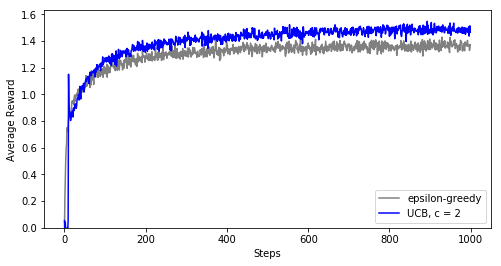

In [9]:
# running and plotting the results

runs = 2000

plt.figure(figsize = (8, 4))

first = run(runs, 0.1); print('First run complete.')
plt.plot(first, color = 'grey', label = 'epsilon-greedy')

second = run(runs); print('Second run complete.')
plt.plot(second, color = 'blue', label = 'UCB, c = 2')

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.ylim(bottom = 0)
plt.legend(loc = 4)

plt.show()